In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.model_selection import KFold, GridSearchCV

In [3]:
import sklearn
print(sklearn.__version__)

1.5.2


In [4]:
data = pd.read_csv('cleaned_data_train.csv')
data_test = pd.read_csv('cleaned_data_test.csv')

In [5]:
data.columns
data.industry = data.industry.astype('category')
data.year = data.year.astype('category')


In [7]:
y =data['credit_score'].astype('float')
y_test = data_test['credit_score'].astype('float')
X = data.drop('credit_score', axis=1)
X_test = data_test.drop('credit_score', axis=1)


In [44]:
param_grid = {
    'objective': ['reg:squarederror'],
    'enable_categorical': [True],
    'random_state':[23],
    
    'max_depth': [4],
    'min_child_weight': [7],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'learning_rate': [0.025],
    'n_estimators': [20],
    'lambda': [1],
    'alpha': [20],
    'validate_parameters': [True],
    'tree_method': ['hist'],
    'missing': [np.nan],
    'max_leaves': [4],
    'booster': ['gbtree'],
}

xgb_model = xgb.XGBRegressor(**param_grid)

kfold = KFold(n_splits=10, shuffle=True, random_state=88)
gb_est = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
grid_result = gb_est.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -1.021279 using {'alpha': 20, 'booster': 'gbtree', 'colsample_bytree': 0.8, 'enable_categorical': True, 'lambda': 1, 'learning_rate': 0.025, 'max_depth': 4, 'max_leaves': 4, 'min_child_weight': 7, 'missing': nan, 'n_estimators': 20, 'objective': 'reg:squarederror', 'random_state': 23, 'subsample': 0.8, 'tree_method': 'hist', 'validate_parameters': True}


/opt/anaconda3/envs/NLP_and_ML/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [45]:
predictions = grid_result.best_estimator_.predict(X_test)

# if predictions less than 3 set them to 0
#predictions[predictions < 3] = 0


# recompute mse
mse = np.mean(abs(predictions - y_test))
print(mse)

0.7695282454125503


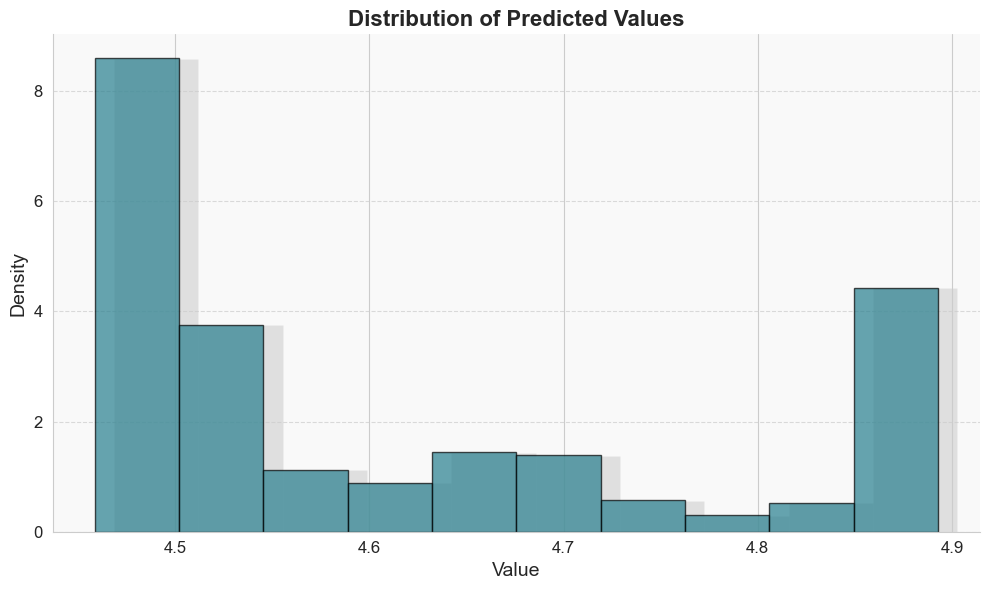

In [49]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))  
n, bins, patches = plt.hist(predictions, bins=10, density=True, alpha=0.7, color=sns.color_palette("viridis")[2], edgecolor='black', linewidth=1)

plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Predicted Values', fontsize=16, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.gca().set_facecolor('#f9f9f9')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for patch in patches:
    patch.set_zorder(1) 
    x, y = patch.xy
    w, h = patch.get_width(), patch.get_height()
    plt.gca().add_patch(plt.Rectangle((x+0.01, y-0.01), w, h, facecolor='black', alpha=0.1, zorder=0))

plt.tight_layout() 
plt.show()